# PROJECT FUTBIZZ (PART 3)

# BID PREDICTION MODEL
In this we take the recommended players from our recommendation system and find the starting bid values for each of our recommended players. Before we predict the values for our recommended players we train and test different models based on our engineered dataset.we use various model and find the model with the least error which predicts actual true value of our player. We find our starting bid value by taking an average of the market value and true predicted value.Lets go through the process of finding the best model in this notebook.

MODELS USED

Desicion tree: A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.Decision trees can be used for supervised and unsupervised learning.

Random forest: Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

Extreme gradient boosting: Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

Linear regression: Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables, they are considering and the number of independent variables being used.

Support Vector Machine- Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences.



### IMPORTING LIBRARIES

In [1]:
#MORE LIBRABRIES ARE USED IN EACH SECTION 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import pickle
import os
from plotly.offline import init_notebook_mode, iplot, plot
from plotly.subplots import make_subplots
import plotly.express as px
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
from IPython.display import display, HTML
import datetime
from datetime import date, timedelta
from math import pi
import pickle 
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram

### LOADING THE ENGINEERED DATASETS FROM RECOMMENDATION MODELS

In [2]:
with open('newfifa.pkl', 'rb') as f:
    fifa = pickle.load(f)

In [3]:
with open('newpredictors.pkl', 'rb') as f:
    predictors_df = pickle.load(f)

In [4]:
predictors_df

,Age,Overall,Potential,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Real Face,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Club_Reputation,Position_Potential,Attacking,Skill,Movement,Power,Mentality,Defending,GoalKeeping,Potential_Difference,Body Type,Attack_WR,Defense_WR,Position_CAM,Position_CB,Position_CDM,Position_CF,Position_CM,Position_GK,Position_LAM,Position_LB,Position_LCB,Position_LCM,Position_LDM,Position_LF,Position_LM,Position_LS,Position_LW,Position_LWB,Position_RAM,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Position_Group_Defender,Position_Group_Forward,Position_Group_GoalKeeper,Position_Group_Midfielder
0,31,94,94,2202,0,5.0,4.0,4.0,1,10.0,5297.0,0,3.0,170,159.0,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2.242424,2,85.0,93.4,91.6,75.6,71.500000,29.000000,10.8,0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,33,94,94,2228,1,5.0,4.0,5.0,1,7.0,175.0,0,4.0,188,183.0,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,2.520000,3,87.0,83.2,86.6,90.0,74.833333,27.333333,11.6,0,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,26,92,93,2143,1,5.0,5.0,5.0,1,10.0,516.0,0,4.0,175,150.0,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2.233333,3,79.2,88.8,91.6,70.6,73.833333,28.000000,11.8,1,1,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,27,91,93,1471,1,4.0,3.0,1.0,1,1.0,2741.0,0,2.0,193,168.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,2.090909,0,22.8,30.2,61.6,43.4,42.666667,16.333333,88.8,2,1,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,27,91,92,2281,1,4.0,5.0,4.0,1,7.0,1220.0,0,5.0,180,154.0,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,2.090909,3,80.8,87.2,80.2,82.0,80.833333,59.000000,11.2,1,2,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [5]:
predictors_df[['Preferred Foot','International Reputation','Weak Foot','Skill Moves','Real Face']]=predictors_df[['Preferred Foot',
                                                                                                                  'International Reputation',
                                                                                                                  'Weak Foot','Skill Moves',
                                                                                                                  'Real Face']].astype('category')


In [6]:
predictors_df[list(predictors_df.loc[:,'Body Type':'Position_Group_Midfielder'])]=predictors_df[list(predictors_df.loc[:,'Body Type':'Position_Group_Midfielder'])].astype('category')

### SPLITING THE TRAIN AND TEST DATASET SO THAT THEY HAVE EQUAL DISTRIBUTION OF VALUES

In [7]:
predictors_df.dtypes

Age                             int64
Overall                         int64
Potential                       int64
Special                         int64
Preferred Foot               category
International Reputation     category
Weak Foot                    category
Skill Moves                  category
Real Face                    category
Jersey Number                 float64
Joined                        float64
Loaned From                     int64
Contract Valid Until          float64
Height                          int64
Weight                        float64
LS                              int64
ST                              int64
RS                              int64
LW                              int64
LF                              int64
CF                              int64
RF                              int64
RW                              int64
LAM                             int64
CAM                             int64
RAM                             int64
LM          

In [8]:
target_val = fifa.Value

In [9]:
target_val_q25, target_val_q75 = np.percentile(target_val, 25), np.percentile(target_val, 75)
target_val_iqr = target_val_q75 - target_val_q25

cut_off = target_val_iqr * 1.5
target_val_upper = target_val_q75 + cut_off

target_val_outliers = [x for x in target_val if x > target_val_upper]

In [10]:
len(target_val_outliers)/len(target_val)

0.1369568808855113

In [11]:
target_val_left=[x for x in target_val if x <= target_val_upper]
q25, q50, q75=np.percentile(target_val_left,25), np.percentile(target_val_left,50), np.percentile(target_val_left,75)

In [12]:
y_binned=[1 if x<=q25 else 2 if q25<x<=q50 else 3 if q50<x<=q75 else 4 if q75<x<=target_val_upper else 5 for x in target_val]

In [13]:
from sklearn.model_selection import train_test_split
train_predictors_val, test_predictors_val, train_target_val, test_target_val = train_test_split(predictors_df,
                                                                                                target_val,
                                                                                                test_size=0.2,
                                                                                                stratify=y_binned)

(array([1.3953e+04, 3.9100e+02, 1.0600e+02, 4.0000e+01, 1.2000e+01,
        1.3000e+01, 7.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([0.0000e+00, 1.1850e+07, 2.3700e+07, 3.5550e+07, 4.7400e+07,
        5.9250e+07, 7.1100e+07, 8.2950e+07, 9.4800e+07, 1.0665e+08,
        1.1850e+08]),
 <a list of 10 Patch objects>)

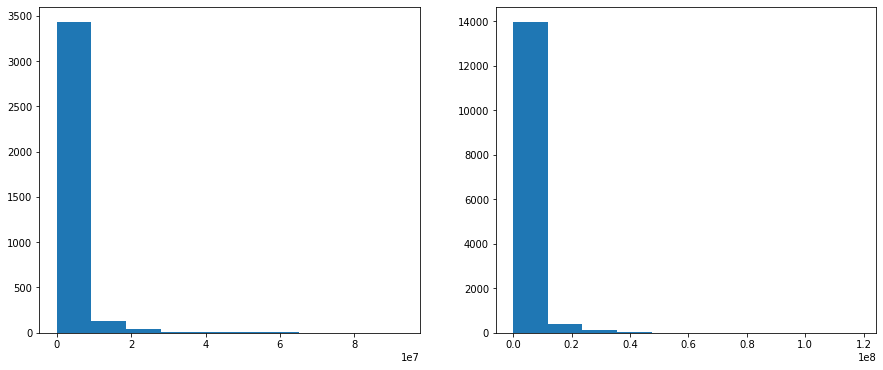

In [14]:
f, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].hist(test_target_val)
ax[1].hist(train_target_val)

we can see that our train and test have the same distribution of values

### SCALING THE DATASET

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_predictors_val[train_predictors_val.select_dtypes(include=['float64','float32','int64','int32'], exclude=['category']).columns] = scaler.fit_transform(train_predictors_val.select_dtypes(include=['float64','float32','int64','int32'], exclude=['category']))

test_predictors_val[test_predictors_val.select_dtypes(include=['float64','float32','int64','int32'], exclude=['category']).columns] = scaler.fit_transform(test_predictors_val.select_dtypes(include=['float64','float32','int64','int32'],exclude=['category']))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [16]:
train_predictors_val[train_predictors_val.select_dtypes(include='category').columns]=train_predictors_val[train_predictors_val.select_dtypes(include='category').columns].astype('int')
test_predictors_val[test_predictors_val.select_dtypes(include='category').columns]=test_predictors_val[test_predictors_val.select_dtypes(include='category').columns].astype('int')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
train_predictors_val.head()

,Age,Overall,Potential,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Real Face,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Club_Reputation,Position_Potential,Attacking,Skill,Movement,Power,Mentality,Defending,GoalKeeping,Potential_Difference,Body Type,Attack_WR,Defense_WR,Position_CAM,Position_CB,Position_CDM,Position_CF,Position_CM,Position_GK,Position_LAM,Position_LB,Position_LCB,Position_LCM,Position_LDM,Position_LF,Position_LM,Position_LS,Position_LW,Position_LWB,Position_RAM,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Position_Group_Defender,Position_Group_Forward,Position_Group_GoalKeeper,Position_Group_Midfielder
106,1.474250,2.713025,2.224731,2.017521,0,3,3,3,1,-1.038974,0.711970,-0.272186,-0.865350,0.268677,-0.190161,1.025742,1.025742,1.025742,1.086136,1.056812,1.056812,1.056812,1.086136,1.092012,1.092012,1.092012,1.156159,1.309043,1.309043,1.309043,1.156159,1.601656,1.511860,1.511860,1.511860,1.601656,1.581265,1.484229,1.484229,1.484229,1.581265,1.985421,0.687789,1.135890,1.454665,0.739991,1.144378,1.463746,1.842135,1.590612,1.477872,0.761741,0.701340,0.779352,2.573591,-0.141406,0.898713,0.502101,1.627716,0.692085,0.671162,1.450751,1.810261,1.078101,1.178002,1.049164,2.576778,1.551582,1.683954,1.903354,-0.316838,-0.083048,-0.436709,-0.434362,-0.650581,3.426699,1.855335,1.401120,1.637060,0.973626,1.246289,2.000953,1.759532,-0.391701,-0.938232,1,3,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
17520,-0.448518,-1.912640,-1.847702,-0.548665,1,1,3,2,0,-0.096110,-0.250054,-0.272186,-0.099670,-1.227786,-0.767158,-0.114790,-0.114790,-0.114790,-0.163048,-0.102079,-0.102079,-0.102079,-0.163048,-0.064649,-0.064649,-0.064649,-0.096710,-0.031848,-0.031848,-0.031848,-0.096710,-0.148796,-0.066763,-0.066763,-0.066763,-0.148796,-0.116875,-0.109181,-0.109181,-0.109181,-0.116875,-0.421045,-0.694934,0.043420,0.637001,-0.504564,-0.284129,-0.444498,-0.335087,0.153584,-0.800075,-0.176329,-0.187566,-0.102681,-1.644871,1.066029,0.203209,-0.600356,-0.453844,-0.973640,-0.525064,0.185669,-0.364481,0.206712,-0.240702,-0.225920,-1.539456,-0.559539,-0.255112,0.070770,-0.091591,-0.554726,-0.195009,-0.609958,-0.650581,-0.505327,0.318532,-0.270791,-0.383483,-0.120054,-0.599757,-0.339343,-0.247193,-0.426874,0.346705,2,2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
6359,0.833327,0.400192,-0.381626,-0.305669,1,1,2,2,0,-0.913259,-0.457600,-0.272186,-0.099670,0.268677,0.386836,-0.313144,-0.313144,-0.313144,-0.595458,-0.536663,-0.536663,-0.536663,-0.595458,-0.594786,-0.594786,-0.594786,-0.530395,-0.280161,-0.280161,-0.280161,-0.530395,0.251307,0.475889,0.475889,0.475889,0.251307,0.382578,0.904807,0.904807,0.904807,0.382578,-0.913277,-0.746146,0.503407,-0.793911,-0.617706,-0.760298,-0.880669,-0.621564,-0.564930,-0.620237,-0.913384,-2.170511,-2.002445,0.797397,0.923978,-0.782089,1.434950,0.492319,1.881889,-0.265015,1.048225,0.940364,-1.074742,-2.297822,-0.417182,0.912769,1.099199,1.222271,0.869589,-0.654709,-0.318887,1.496888,-0.551426,0.237164,-0.339609,0.318532,-0.607869,-0.762335,-0.980655,0.540448,-0.161426,1.090623,0.030380,-0.938232,2,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
11531,0.192405,-0.322568,-0.707421,-1.859370,1,1,3,1,1,-1.164690,-0.683422,-0.272186,0.666011,1.016909,0.

### FITTING OUR DATASET AND PREDICTING ON DIFFERENT BASE MODELS 

In [18]:
import sklearn.model_selection as cv
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score, LeaveOneOut

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
xbr=xgb.XGBRegressor()
lre=LinearRegression()
svr=SVR()

models = [dtr,rfr,xbr,lre,svr]

for mod in models:
    mod.fit(train_predictors_val, train_target_val)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



### ERROR VALUES IN EACH BASE MODELS

In [19]:
test_error = []

# Sequentially fit all models and calculate test score
for mod in models:
    y_pred = mod.predict(test_predictors_val)
    mse_mod = MSE(test_target_val, y_pred)
    rmse_mod = round(mse_mod**(1/2))
    test_error.append(rmse_mod)

In [20]:
cv_error=[]

for mod in models:
    MSE_cv_error = -cross_val_score(mod, train_predictors_val,
                                    train_target_val, scoring='neg_mean_squared_error', n_jobs=-1)
    RMSE_cv = round((MSE_cv_error.mean())**(1/2))
    cv_error.append(RMSE_cv)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



In [21]:
train_error=[]

# Sequentially fit all models and calculate train score
for mod in models:
    y_pred = mod.predict(train_predictors_val)
    mse_mod = MSE(train_target_val, y_pred)
    rmse_mod = round(mse_mod**(1/2))
    train_error.append(rmse_mod)

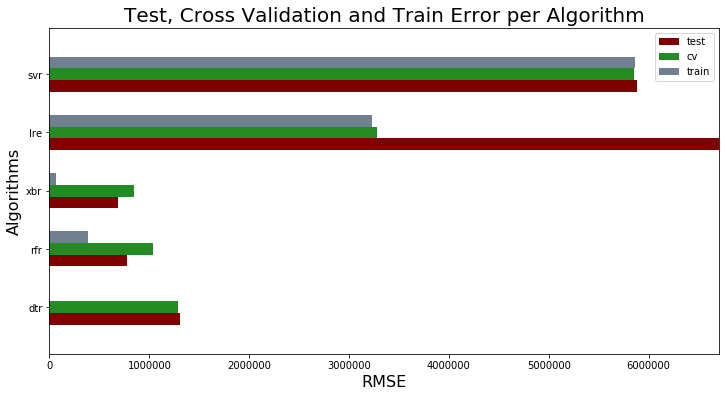

In [22]:
model_names = ['dtr','rfr','xbr','lre','svr']

error = pd.DataFrame(dict(graph=model_names,test_error=test_error, cv_error=cv_error, train_error=train_error)) 

ind = np.arange(len(error))
width = 0.2

fig, ax = plt.subplots(figsize=(12,6))
ax.barh(ind, error.test_error, width, color='maroon', label='test')
ax.barh(ind + width, error.cv_error, width, color='forestgreen', label='cv')
ax.barh(ind + 2*width, error.train_error, width, color='slategrey', label='train')
ax.set_xlim(0, max(error.cv_error)+min(error.cv_error))
plt.xlabel('RMSE', fontsize=16)
plt.ylabel('Algorithms', fontsize=16)
plt.title('Test, Cross Validation and Train Error per Algorithm',fontsize=20)

ax.set(yticks=ind + width, yticklabels=error.graph, ylim=[2*width - 1, len(error)])
ax.legend()

plt.show()

we will try to reduce the errors in each baseline model by using feature selection and hypertuning.

### FEATURE SELECTION

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = train_predictors_val  
y = train_target_val
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores['Expl_percent']=(featureScores['Score']/featureScores['Score'].sum())*100
featureScores.nlargest(125,'Score')

,Specs,Score,Expl_percent
5,International Reputation,10835.556094,10.434233
1,Overall,9386.160402,9.038519
75,Club_Reputation,8694.782056,8.372748
2,Potential,7207.653570,6.940699
54,Reactions,5975.982884,5.754647
66,Composure,3637.162121,3.502450
8,Real Face,3491.020005,3.361721
3,Special,2364.054785,2.276496
64,Vision,2089.332529,2.011949
81,Mentality,1880.715336,1.811058


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



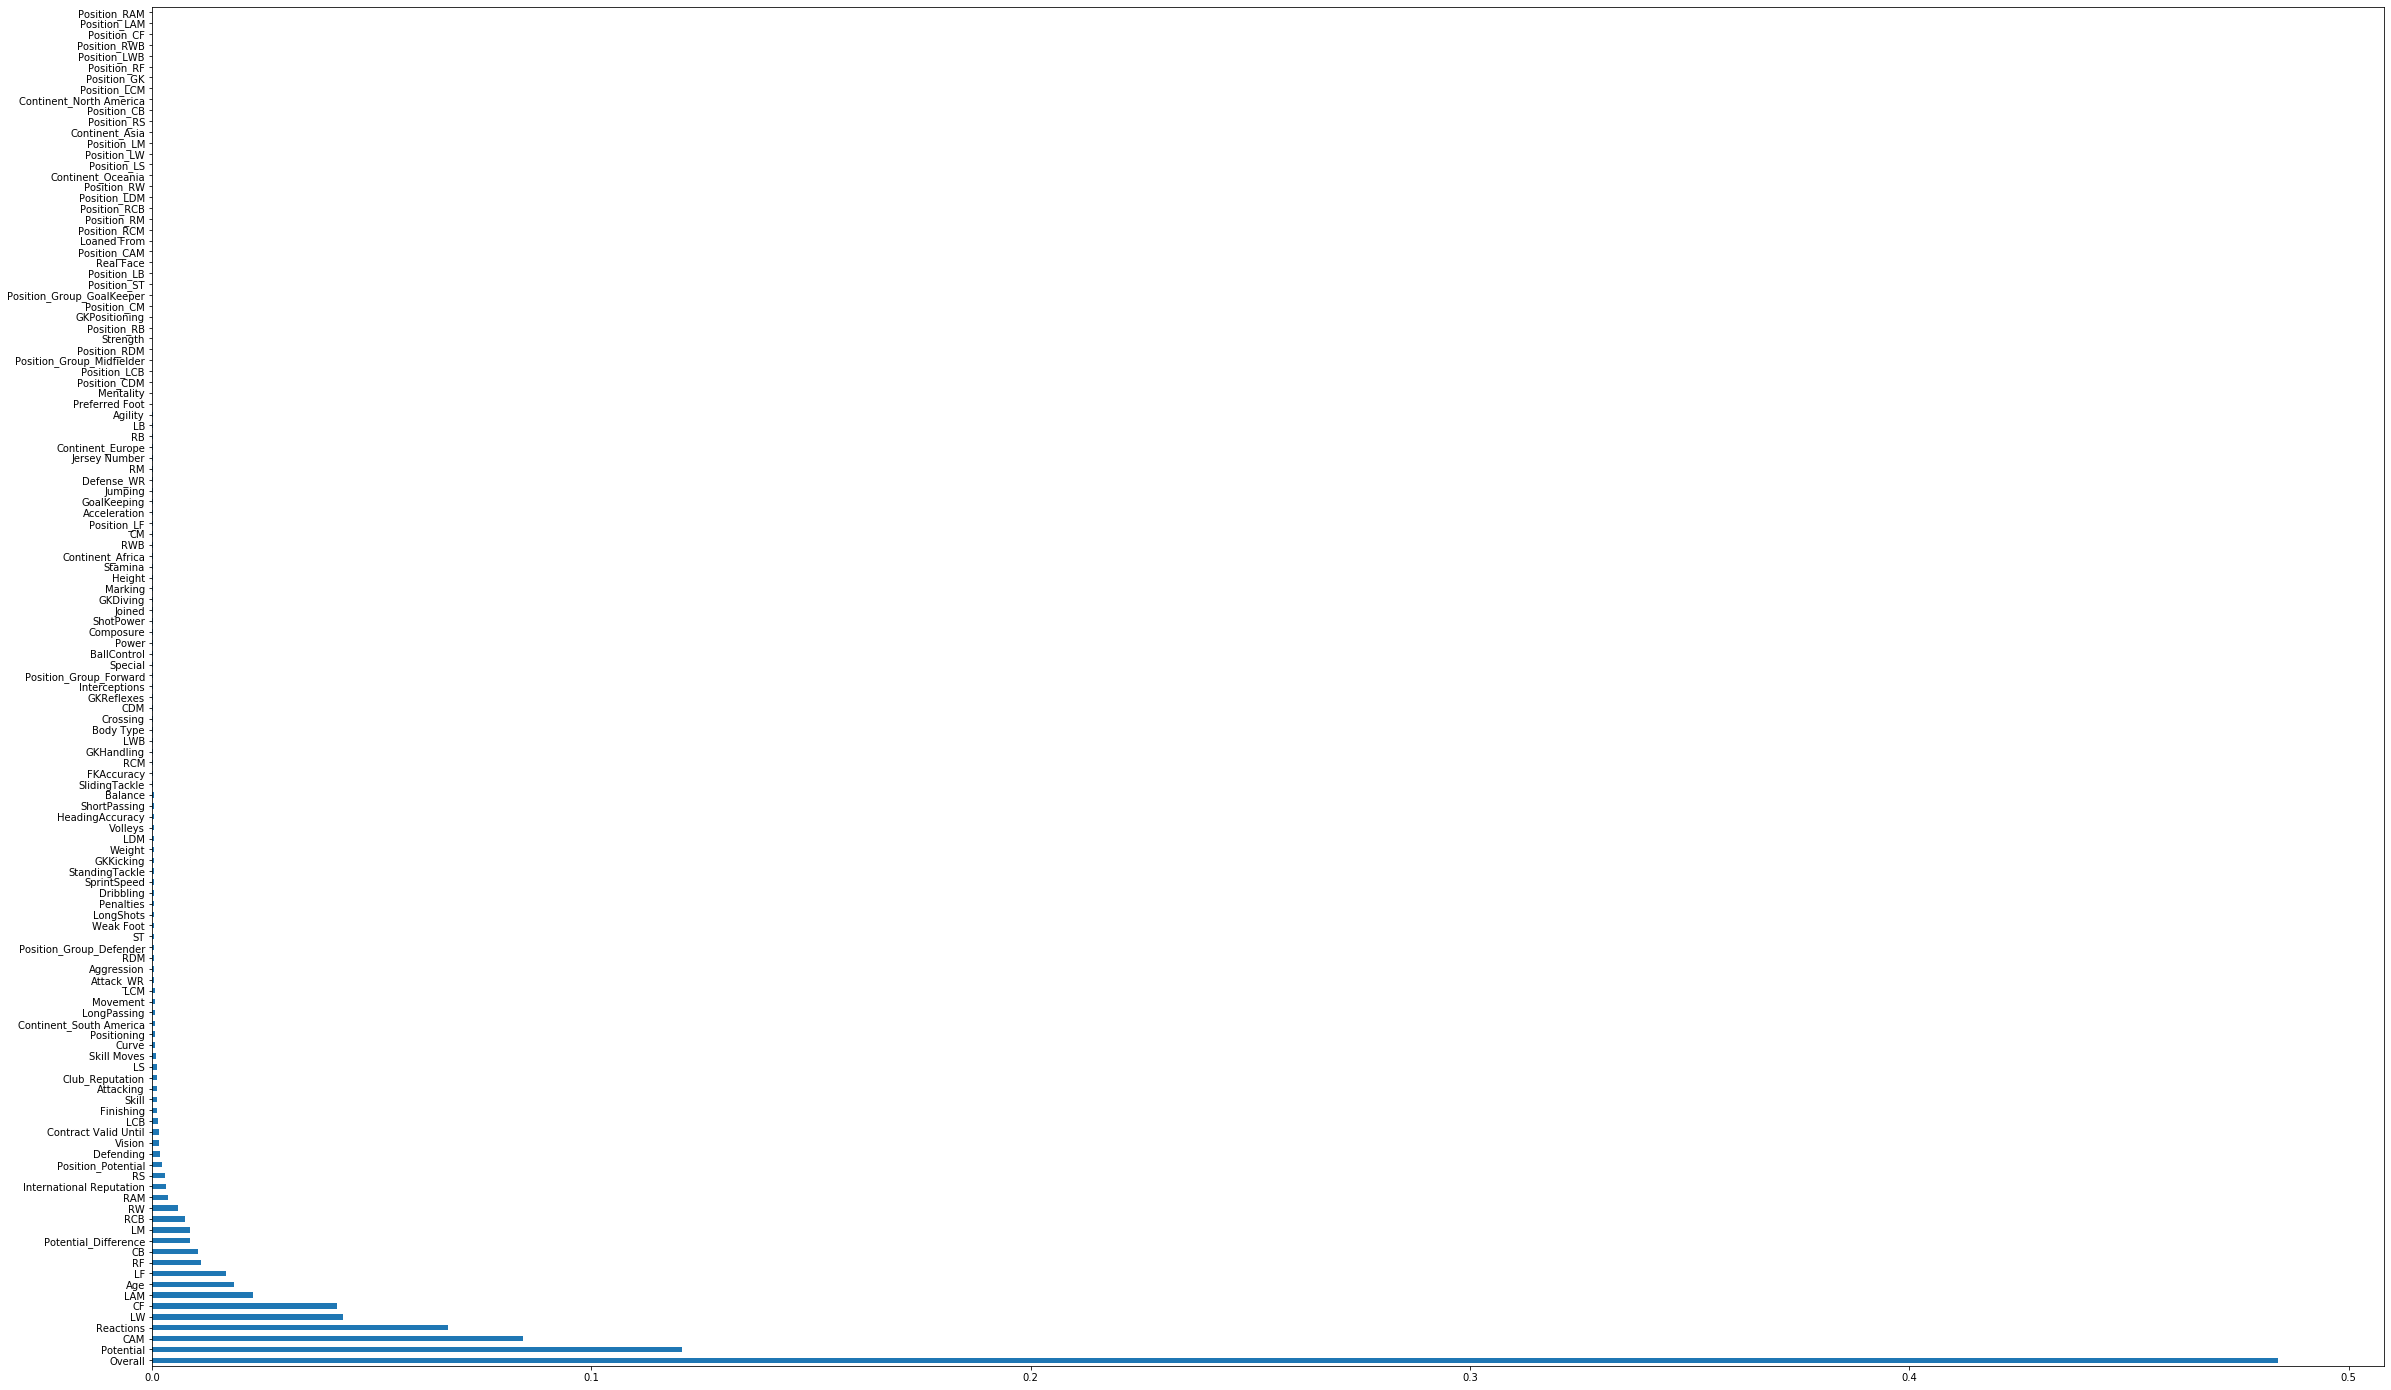

In [24]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

#plot graph of feature importances for better visualization
fig, ax = plt.subplots(figsize=(40,25))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(125).plot(kind='barh')
feat_importancesdf=pd.DataFrame(model.feature_importances_)
plt.show()

Based on our feature importance analysis, we are making the following modifications:
- Group position skills into 'Forward Skills', 'Midfield Skills' and 'Defence Skills' and drop single position skills to avoid overemphasizing these features
- Drop individual position dummies and only keep the grouped position dummies to avoid duplication of features
- We select the top 10 features in 2 different feature selection algorithms such as Kbest and extraregressor tree. 

In [25]:
predictors_df['Forward_Skill'] = predictors_df.loc[:,['LS',  'ST', 'RS',  'LW', 'LF', 'CF', 'RF', 'RW']].mean(axis=1)

predictors_df['Midfield_Skill'] = predictors_df.loc[:,['LAM','CAM','RAM', 'LM', 'LCM', 'CM' ,'RCM', 'RM','LDM', 'CDM', 'RDM']].mean(axis=1)

predictors_df['Defence_Skill'] = predictors_df.loc[:,['LWB','RWB', 'LB','LCB','CB','RCB','RB']].mean(axis=1)

predictors_df = predictors_df.drop(['LS',  'ST', 'RS',  'LW', 'LF', 'CF', 'RF', 'RW',
          'LAM','CAM','RAM', 'LM', 'LCM', 'CM' ,'RCM', 'RM','LDM', 'CDM', 'RDM',
          'LWB','RWB', 'LB','LCB','CB','RCB','RB'], axis = 1)

In [26]:
predictors_df=predictors_df.drop(predictors_df.iloc[:,predictors_df.columns.get_loc('Position_CAM'):predictors_df.columns.get_loc('Position_ST')+1], axis=1)

In [27]:
featureScores_topten=list(featureScores.sort_values(by='Expl_percent', ascending=False)[0:10]['Specs'])
feat_importances_topten=list(feat_importances.sort_values(ascending=False)[0:10].index.values)
Position_features=['Position_Group_Defender','Position_Group_Forward','Position_Group_GoalKeeper','Position_Group_Midfielder']
features_keep=list(set(featureScores_topten+feat_importances_topten+Position_features))

In [28]:
predictors_df.head()

,Age,Overall,Potential,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Real Face,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Club_Reputation,Position_Potential,Attacking,Skill,Movement,Power,Mentality,Defending,GoalKeeping,Potential_Difference,Body Type,Attack_WR,Defense_WR,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Position_Group_Defender,Position_Group_Forward,Position_Group_GoalKeeper,Position_Group_Midfielder,Forward_Skill,Midfield_Skill,Defence_Skill
0,31,94,94,2202,0,5.0,4.0,4.0,1,10.0,5297.0,0,3.0,170,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2.242424,2,85.0,93.4,91.6,75.6,71.500000,29.000000,10.8,0,1,2,2,0,0,0,0,0,1,0,1,0,0,90.875,81.454545,55.285714
1,33,94,94,2228,1,5.0,4.0,5.0,1,7.0,175.0,0,4.0,188,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,2.520000,3,87.0,83.2,86.6,90.0,74.833333,27.333333,11.6,0,2,3,1,0,0,1,0,0,0,0,1,0,0,90.125,78.727273,58.714286
2,26,92,93,2143,1,5.0,5.0,5.0,1,10.0,516.0,0,4.0,175,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2.233333,3,79.2,88.8,91.6,70.6,73.833333,28.000000,11.8,1,1,3,2,0,0,0,0,0,1,0,1,0,0,87.125,78.727273,55.857143
3,27,91,93,1471,1,4.0,3.0,1.0,1,1.0,2741.0,0,2.0,193,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,2.090909,0,22.8,30.2,61.6,43.4,42.666667,16.333333,88.8,2,1,2,2,0,0,1,0,0,0,0,0,1,0,0.000,0.000000,0.000000
4,27,91,92,2281,1,4.0,5.0,4.0,1,7.0,1220.0,0,5.0,180,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,2.090909,3,80.8,87.2,80.2,82.0,80.833333,59.000000,11.2,1,2,3,3,0,0,1,0,0,0,0,0,0,1,85.125,84.727273,71.142857


### SPLITING AND SCALING THE NEW DATASET TO TRAIN AND TEST SETS

In [29]:
train_predictors_val, test_predictors_val, train_target_val, test_target_val = train_test_split(predictors_df,
                                                                                                target_val,
                                                                                                test_size=0.2,
                                                                                                stratify=y_binned)

In [30]:
scaler = StandardScaler()

train_predictors_val[train_predictors_val.select_dtypes(include=['float64','float32','int64','int32'], exclude=['category']).columns] = scaler.fit_transform(train_predictors_val.select_dtypes(include=['float64','float32','int64','int32'], exclude=['category']))

test_predictors_val[test_predictors_val.select_dtypes(include=['float64','float32','int64','int32'], exclude=['category']).columns] = scaler.fit_transform(test_predictors_val.select_dtypes(include=['float64','float32','int64','int32'],exclude=['category']))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [31]:
train_predictors_val[train_predictors_val.select_dtypes(include='category').columns]=train_predictors_val[train_predictors_val.select_dtypes(include='category').columns].astype('int')
test_predictors_val[test_predictors_val.select_dtypes(include='category').columns]=test_predictors_val[test_predictors_val.select_dtypes(include='category').columns].astype('int')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
train_predictors_val

,Age,Overall,Potential,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Real Face,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Club_Reputation,Position_Potential,Attacking,Skill,Movement,Power,Mentality,Defending,GoalKeeping,Potential_Difference,Body Type,Attack_WR,Defense_WR,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Position_Group_Defender,Position_Group_Forward,Position_Group_GoalKeeper,Position_Group_Midfielder,Forward_Skill,Midfield_Skill,Defence_Skill
8949,1.035838,-0.038745,-0.867821,0.489029,1,1,3,2,0,-1.097244,-0.292409,-0.274368,-0.850382,-1.228059,-0.582317,0.833507,-0.482508,0.732533,0.295483,0.121109,0.248003,-0.653321,-0.214416,0.800029,-0.075545,-0.100839,-0.042891,0.851431,1.015330,0.851566,0.206722,1.261228,0.366015,0.854353,-0.209437,0.356539,0.982823,-0.094418,-0.097894,-0.788497,1.073097,0.892529,0.754983,0.863982,-0.044129,-0.208578,-0.263040,-0.148342,-0.323998,-0.505760,0.321906,0.337385,-0.000847,0.563369,0.556344,0.314232,0.856620,-0.199875,-0.934127,2,2,2,0,0,1,0,0,0,1,0,0,0,0.181340,0.392599,0.729903
15985,-1.096458,-1.200141,-0.052763,-1.008878,1,1,2,2,0,1.407811,-0.686312,-0.274368,0.679558,-0.928340,0.634538,-0.792438,-1.094771,-0.010649,-0.854192,-0.779103,-0.750147,-0.653321,-0.556277,-1.278359,-1.442229,-1.434744,-1.402592,-0.364734,-1.874457,0.499117,-0.832335,0.079592,-0.258659,0.214329,-1.243364,-0.504643,0.306495,-0.908070,-1.718650,-0.028024,-1.620004,0.391175,0.893331,1.051649,-0.490940,-0.617937,-0.502167,-0.670911,-0.158854,-0.197994,0.321906,-0.838102,-1.002727,-1.019594,-0.699465,-0.863183,0.807753,-0.490437,1.467327,3,2,2,0,0,0,1,0,0,1,0,0,0,-0.712414,-0.541014,0.153920
4061,1.675526,0.687129,-0.052763,0.631166,1,1,3,3,1,0.531042,0.010792,-0.274368,-0.850382,-0.179043,0.122178,0.345723,1.252238,0.904037,0.160227,1.583954,0.563209,0.807942,0.526285,-0.498964,0.934612,0.632808,0.025094,1.054125,0.904184,0.005687,0.841701,0.586008,0.553418,0.534341,1.082972,-1.251001,-0.563069,1.075207,1.170523,1.683039,1.159972,-0.410992,-1.135774,-1.106520,-0.155832,-0.091619,-0.143477,-0.148342,-0.213902,0.089254,0.321906,1.031991,0.537664,0.598941,1.040728,0.598436,-0.918877,-0.153386,-0.934127,2,3,3,0,0,1,0,0,0,0,1,0,0,0.821461,0.428680,-0.091927
7629,0.609378,0.251605,-0.215774,-1.242129,1,1,3,1,0,0.343162,0.968339,-0.274368,0.679558,-0.179043,-0.069957,-1.930599,-1.298859,-2.011524,-0.718936,-1.735579,-2.116037,-1.194529,-1.410931,-0.498964,-2.571229,-1.968305,-2.966247,-0.567428,0.793038,-1.192642,-1.294139,1.176826,-2.132683,0.454338,-1.398453,-0.619468,-0.804614,-1.975989,0.818185,-1.485596,-0.230016,-1.814783,-1.043542,-0.965770,2.804289,2.715414,2.965171,2.812883,2.923841,-0.505760,-2.708763,-1.839937,-1.729090,-1.624322,-1.147968,-1.093252,-1.293523,2.880073,-0.564673,1,2,2,0,0,0,0,0,1,0,0,1,0,-2.499923,-2.561587,-2.459080
10863,-0.456770,-0.183919,-0.052763,0.547342,1,1,3,2,0,-0.909365,1.195092,-0.274368,-0.850382,-0.928340,-1.863216,0.345723,-0.533530,0.618198,0.430739,0.008583,0.090401,0.645579,-0.499300,0.929928,0.280981,0.899589,0.772929,0.851431,-0.207272,0.781076,0.148996,1.261228,0.116146,-0.505698,0.100742,0.528775,0.886205,-0.450391,0.324912,-0.154770,1.159972,0.742123,0.801099,0.957815,-0.211683,-0.267058,-0.442385,-0.264468,-0.103806,-0.505760,0.321906,0.177091,0.299717,0.830161,0.269302,0.463101,0.856620,-0.257988,0.174236,1,2,3,1,0,0,0,0,0,0,0,0,1,0.181340,0.419660,0.687758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [33]:
with open('train_predictors_val.pkl', 'wb') as f:
    pickle.dump(train_predictors_val, f)

In [34]:
train_target_val.head()

8949      475000.0
15985     220000.0
4061     1500000.0
7629      750000.0
10863     625000.0
Name: Value, dtype: float64

In [35]:
with open('train_target_val.pkl', 'wb') as f:
    pickle.dump(train_target_val, f)

### HYPERTUNING OUR MODELS USING GRIDSEARCHCV (FINAL MODELS)

GridSearchCV is a library function that is a member of sklearn’s model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.

#### Decision Tree Regressor

In [36]:
from sklearn.model_selection import GridSearchCV

# Parameter's to search
max_depth = [1,2,3,4,5,6,7,8,9,10]
min_samples_split = [0.1,0.3,0.5,0.7,2]
min_samples_leaf = [1,2,3,4]
max_features = [1,2,3,4]

# Setting up parameter grid
hyperparams = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 
               'max_features': max_features}

# Run GridSearch CV
gd=GridSearchCV(estimator = dtr, param_grid = hyperparams, 
                verbose=True, cv=10, scoring = 'neg_mean_squared_error')

# Fitting model and return results
gd.fit(train_predictors_val, train_target_val)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 800 candidates, totalling 8000 fits
-6201792882948.891
DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=4,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:  1.6min finished


In [37]:
from sklearn.model_selection import GridSearchCV
dtr=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=4,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

dtr.fit(train_predictors_val, train_target_val)

# Test error
y_pred = dtr.predict(test_predictors_val)
test_mse_dtr = MSE(test_target_val, y_pred)
test_rmse_dtr = round(test_mse_dtr**(1/2))

In [38]:
# Cross-validation error
MSE_cv_error_dtr = -cross_val_score(dtr, train_predictors_val,
                                    train_target_val, scoring='neg_mean_squared_error', n_jobs=-1)
RMSE_cv_dtr = round((MSE_cv_error_dtr.mean())**(1/2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



In [39]:
# Train error
y_pred = dtr.predict(train_predictors_val)
train_mse_dtr = MSE(train_target_val, y_pred)
train_rmse_dtr = round(train_mse_dtr**(1/2))

In [40]:
pd.DataFrame([test_rmse_dtr,RMSE_cv_dtr,train_rmse_dtr], 
             index=['Test error','CV error','Train error'], 
             columns=['DTR errors'])

,DTR errors
Test error,3061084.0
CV error,2880716.0
Train error,2266979.0


####  Random Forest Regressor

In [41]:
# Parameter's to search
n_estimators = [5,10,100]
max_depth = [1,4,8]
min_samples_split = [0.1,0.5,2]
min_samples_leaf = [1,2,4]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators,
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Run GridSearch CV
gd=GridSearchCV(estimator = rfr, param_grid = hyperparams, 
                verbose=True, cv=3, scoring = 'neg_mean_squared_error')

# Fitting model and return results
gd.fit(train_predictors_val, train_target_val)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:  5.3min finished


-749781750174.4642
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [42]:
rfr=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

rfr.fit(train_predictors_val, train_target_val)

# Test error
y_pred = rfr.predict(test_predictors_val)
test_mse_rfr = MSE(test_target_val, y_pred)
test_rmse_rfr = round(test_mse_rfr**(1/2))

In [43]:
# Cross-validation error
MSE_cv_error_rfr = -cross_val_score(rfr, train_predictors_val,
                                    train_target_val, scoring='neg_mean_squared_error', n_jobs=-1)
RMSE_cv_rfr = round((MSE_cv_error_rfr.mean())**(1/2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



In [44]:
# Train error
y_pred = rfr.predict(train_predictors_val)
train_mse_rfr = MSE(train_target_val, y_pred)
train_rmse_rfr = round(train_mse_rfr**(1/2))

In [45]:
pd.DataFrame([test_rmse_rfr,RMSE_cv_rfr,train_rmse_rfr], 
             index=['Test error','CV error','Train error'], 
             columns=['RFR errors'])

,RFR errors
Test error,1110891.0
CV error,913951.0
Train error,478644.0


####  Extreme Gradient Boosting (XGB Regressor)

In [46]:
max_depth = [1,4,8]
min_child_weight = [1,4,6]
gamma = [0,0.5]
eta = [0.1,0.2,0.3]
subsample = [0.5,1]

# Setting up parameter grid
hyperparams = {'max_depth': max_depth,
               'min_child_weight': min_child_weight, 
               'gamma': gamma,
               'eta': eta,
              'subsample': subsample}

# Run GridSearch CV
gd=GridSearchCV(estimator = xbr, param_grid = hyperparams, 
                verbose=True, cv=3, scoring = 'neg_mean_squared_error')

# Fitting model and return results
gd.fit(train_predictors_val, train_target_val)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:  3.9min finished


-487397661601.5467
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


In [47]:
xbr=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=6, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)

xbrfinal=xbr.fit(train_predictors_val, train_target_val)

# Test error
y_pred = xbr.predict(test_predictors_val)
test_mse_xbr = MSE(test_target_val, y_pred)
test_rmse_xbr = round(test_mse_xbr**(1/2))

[18:06:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [48]:
pickle.dump(xbrfinal, open('finalxbrmodel.pkl','wb'))

In [49]:
xx

NameError: name 'xx' is not defined

In [ ]:
# Train error
y_pred = xbr.predict(train_predictors_val)
train_mse_xbr = MSE(train_target_val, y_pred)
train_rmse_xbr = round(train_mse_xbr**(1/2))

In [ ]:
pd.DataFrame([test_rmse_xbr,RMSE_cv_xbr,train_rmse_xbr], 
             index=['Test error','CV error','Train error'], 
             columns=['XBR errors'])

####  Linear Regression

In [ ]:
lre=LinearRegression(fit_intercept=False, normalize=False, copy_X=True, n_jobs=None)

lre.fit(train_predictors_val, train_target_val)

# Test error
y_pred = lre.predict(test_predictors_val)
test_mse_lre = MSE(test_target_val, y_pred)
test_rmse_lre = round(test_mse_lre**(1/2))

In [ ]:
# Cross-validation error
MSE_cv_error_lre = -cross_val_score(lre, train_predictors_val,
                                    train_target_val, scoring='neg_mean_squared_error', n_jobs=-1)
RMSE_cv_lre = round((MSE_cv_error_lre.mean())**(1/2))

In [ ]:
# Train error
y_pred = lre.predict(train_predictors_val)
train_mse_lre = MSE(train_target_val, y_pred)
train_rmse_lre = round(train_mse_lre**(1/2))

In [ ]:
pd.DataFrame([test_rmse_lre,RMSE_cv_lre,train_rmse_lre], 
             index=['Test error','CV error','Train error'], 
             columns=['LRE errors'])

#### Support Vector Regression


In [ ]:
C = [0.001, 0.01, 0.1, 1, 10]
gamma = [0.001, 0.01, 0.1, 1]

# Setting up parameter grid
hyperparams = {'C': C,
               'gamma': gamma}

# Run GridSearch CV
gd=GridSearchCV(estimator = svr, param_grid = hyperparams, 
                verbose=True, cv=3, scoring = 'neg_mean_squared_error')

# Fitting model and return results
gd.fit(train_predictors_val, train_target_val)
print(gd.best_score_)
print(gd.best_estimator_)

In [ ]:
svr=SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

svr.fit(train_predictors_val, train_target_val)

# Test error
y_pred = svr.predict(test_predictors_val)
test_mse_svr = MSE(test_target_val, y_pred)
test_rmse_svr = round(test_mse_svr**(1/2))

In [ ]:
# Cross-validation error
MSE_cv_error_svr = -cross_val_score(svr, train_predictors_val,
                                    train_target_val, scoring='neg_mean_squared_error', n_jobs=-1)
RMSE_cv_svr = round((MSE_cv_error_svr.mean())**(1/2))

In [ ]:
# Train error
y_pred = svr.predict(train_predictors_val)
train_mse_svr = MSE(train_target_val, y_pred)
train_rmse_svr = round(train_mse_svr**(1/2))

In [ ]:
pd.DataFrame([test_rmse_svr,RMSE_cv_svr,train_rmse_svr], 
             index=['Test error','CV error','Train error'], 
             columns=['SVR errors'])

### BEST FINAL MODEL FOR BID PREDICTIONS

In [ ]:
models = [dtr,rfr,xbr,lre,svr]

for mod in models:
    mod.fit(train_predictors_val, train_target_val)
    

In [ ]:
test_error = []

# Sequentially fit all models and calculate test score
for mod in models:
    y_pred = mod.predict(test_predictors_val)
    mse_mod = MSE(test_target_val, y_pred)
    rmse_mod = round(mse_mod**(1/2))
    test_error.append(rmse_mod)

In [ ]:
cv_error=[]

for mod in models:
    MSE_cv_error = -cross_val_score(mod, train_predictors_val,
                                    train_target_val, scoring='neg_mean_squared_error', n_jobs=-1)
    RMSE_cv = round((MSE_cv_error.mean())**(1/2))
    cv_error.append(RMSE_cv)

In [ ]:
train_error=[]

# Sequentially fit all models and calculate train score
for mod in models:
    y_pred = mod.predict(train_predictors_val)
    mse_mod = MSE(train_target_val, y_pred)
    rmse_mod = round(mse_mod**(1/2))
    train_error.append(rmse_mod)

In [ ]:
model_names = ['dtr','rfr','xbr','lre','svr']

error = pd.DataFrame(dict(graph=model_names,test_error=test_error, cv_error=cv_error, train_error=train_error)) 

ind = np.arange(len(error))
width = 0.2

fig, ax = plt.subplots(figsize=(12,6))
ax.barh(ind, error.test_error, width, color='maroon', label='test')
ax.barh(ind + width, error.cv_error, width, color='forestgreen', label='cv')
ax.barh(ind + 2*width, error.train_error, width, color='slategrey', label='train')
ax.set_xlim(0, max(error.cv_error)+min(error.cv_error))
plt.xlabel('RMSE', fontsize=16)
plt.ylabel('Algorithms', fontsize=16)
plt.title('Test, Cross Validation and Train Error per Algorithm',fontsize=20)

ax.set(yticks=ind + width, yticklabels=error.graph, ylim=[2*width - 1, len(error)])
ax.legend()

plt.show()

In [ ]:
error

we can see that the final model with the least errors(train , test and cross validation) is our Extreme Gradient Boosting (XGB Regressor) followed by random forest regressor,desicion tree etc

### APPLYING OUR FINAL MODEL ON THE RECOMMENDED PLAYERS

In [ ]:
with open('finalpred.pkl', 'rb') as r:
    playrpredictorss = pickle.load(r)

In [ ]:
with open('undervalue_players2.pkl', 'rb') as r:
    undervalue_players2 = pickle.load(r)

In [ ]:
with open('undervalue_players.pkl', 'rb') as r:
     fifa_prednew= pickle.load(r)

In [ ]:
 fifa_prednew

In [ ]:
playrpredictorss

In [ ]:
undervalue_players2

In [ ]:
train_predictors_val.head()

In [ ]:
train_predictors_val.shape

###  ENGINEERING ON THE RECOMMENED PLAYERS PREDICTION SET

In [ ]:
predictors_anomaly_processed=playrpredictorss[playrpredictorss.index.isin(list(undervalue_players2['ID']))].copy()

In [ ]:
predictors_anomaly_processed

In [ ]:
predictors_anomaly_processed['Forward_Skill'] = predictors_anomaly_processed.loc[:,['LS',  'ST', 'RS',  'LW', 'LF', 'CF', 'RF', 'RW']].mean(axis=1)

predictors_anomaly_processed['Midfield_Skill'] = predictors_anomaly_processed.loc[:,['LAM','CAM','RAM', 'LM', 'LCM', 'CM' ,'RCM', 'RM','LDM', 'CDM', 'RDM']].mean(axis=1)

predictors_anomaly_processed['Defence_Skill'] = predictors_anomaly_processed.loc[:,['LWB','RWB', 'LB','LCB','CB','RCB','RB']].mean(axis=1)

predictors_anomaly_processed = predictors_anomaly_processed.drop(['LS',  'ST', 'RS',  'LW', 'LF', 'CF', 'RF', 'RW',
          'LAM','CAM','RAM', 'LM', 'LCM', 'CM' ,'RCM', 'RM','LDM', 'CDM', 'RDM',
          'LWB','RWB', 'LB','LCB','CB','RCB','RB'], axis = 1)

In [ ]:
predictors_anomaly_processed=predictors_anomaly_processed.drop(predictors_anomaly_processed.iloc[:,predictors_anomaly_processed.columns.get_loc('Position_CAM'):predictors_anomaly_processed.columns.get_loc('Position_ST')+1], axis=1)

In [ ]:
predictors_anomaly_processed=predictors_anomaly_processed[train_predictors_val.columns]
predictors_anomaly_processed[['International Reputation','Real Face']]=predictors_anomaly_processed[['International Reputation','Real Face']].astype('category')

In [ ]:
predictors_anomaly_processed

In [ ]:
scaler = StandardScaler()

predictors_anomaly_processed[predictors_anomaly_processed.select_dtypes(include=['float64','float32','int64','int32'], exclude=['category']).columns] = scaler.fit_transform(predictors_anomaly_processed.select_dtypes(include=['float64','float32','int64','int32'], exclude=['category']))


In [ ]:
predictors_anomaly_processed[predictors_anomaly_processed.select_dtypes(include='category').columns]=predictors_anomaly_processed[predictors_anomaly_processed.select_dtypes(include='category').columns].astype('int')

In [ ]:
predictors_anomaly_processed

In [ ]:
predictions = abs(xbr.predict(predictors_anomaly_processed))
predictions = predictions.astype('int64')
predictions


the predicted value show the true value of the player.The true value of the players suggests how much the player would actually cost without any hype or other external expenses. we can find the starting bid for the player by findinG a decent price between the market value and true value of the player. we do so by finding the average between the true value and market value of the player.

In [ ]:
recomid=fifa_prednew['ID'].reset_index(drop=True)
recomname=fifa_prednew['Name'].reset_index(drop=True)
recomnvalue=fifa_prednew['Value'].reset_index(drop=True)
bidpredictions=pd.dataframedf = pd.DataFrame({'ID':recomid, 
                    'Name':recomname, 'actual_value':recomnvalue,
                    'true_predicted_value':predictions}) 
bidpredictions = bidpredictions.set_index('ID')
bidpredictions['starting bid'] = bidpredictions.apply(lambda row: ((row.actual_value  + row.true_predicted_value)/2), axis=1)
bidpredictions

### DUMPING THE RECOMMENDED PLAYERS INTO PICKLE FILE

In [ ]:
with open('bidpredictions.pkl', 'wb') as f:
    pickle.dump(bidpredictions, f)